In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [123]:
df=pd.read_csv("E:\DataScience-data\Bank_churn_modelling.csv")

In [124]:
df.shape

(10000, 14)

In [125]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [126]:
x=['CreditScore', 'Geography','Gender', 'Age','Balance', 'NumOfProducts', 'IsActiveMember']
y=['Exited']

In [127]:
x=df[x]
y=df[y]

In [128]:
print(x.shape)
print(y.shape)

(10000, 7)
(10000, 1)


In [129]:
x.head()

,CreditScore,Geography,Gender,Age,Balance,NumOfProducts,IsActiveMember
0,619,France,Female,42,0.00,1,1
1,608,Spain,Female,41,83807.86,1,1
2,502,France,Female,42,159660.80,3,0
3,699,France,Female,39,0.00,2,0
4,850,Spain,Female,43,125510.82,1,1


In [130]:
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
l1=LabelEncoder()
x["Gender"]=l1.fit_transform(x["Gender"])

C:\Users\aspdiscovery\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [131]:
encoder=ColumnTransformer([("sc",StandardScaler(),[0,3,4,5]),("on",OneHotEncoder(),[1])],remainder='passthrough')

In [132]:
encoder.fit(x)
x1=encoder.transform(x)

In [133]:
x2=pd.DataFrame(x1)
x2.head()

,0,1,2,3,4,5,6,7,8
0,-0.326221,0.293517,-1.225848,-0.911583,1.0,0.0,0.0,0.0,1.0
1,-0.440036,0.198164,0.117350,-0.911583,0.0,0.0,1.0,0.0,1.0
2,-1.536794,0.293517,1.333053,2.527057,1.0,0.0,0.0,0.0,0.0
3,0.501521,0.007457,-1.225848,0.807737,1.0,0.0,0.0,0.0,0.0
4,2.063884,0.388871,0.785728,-0.911583,0.0,0.0,1.0,0.0,1.0


In [134]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x2,y,test_size=0.2)

In [135]:
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(8000, 9)
(8000, 1)
(2000, 9)
(2000, 1)


In [136]:
from sklearn.tree import DecisionTreeClassifier
algo=DecisionTreeClassifier(criterion='entropy',max_depth=3)

In [137]:
algo.fit(xtrain,ytrain)
ypred=algo.predict(xtest)

In [138]:
from sklearn.metrics import accuracy_score
print(accuracy_score(ytest,ypred))

0.832


In [139]:
import joblib

joblib.dump(algo,r'E:\DataScience-data\bank-model.pkl')

['E:\\DataScience-data\\bank-model.pkl']

In [140]:
joblib.dump(encoder,r'E:\DataScience-data\bank-model-encoder.pkl')

['E:\\DataScience-data\\bank-model-encoder.pkl']

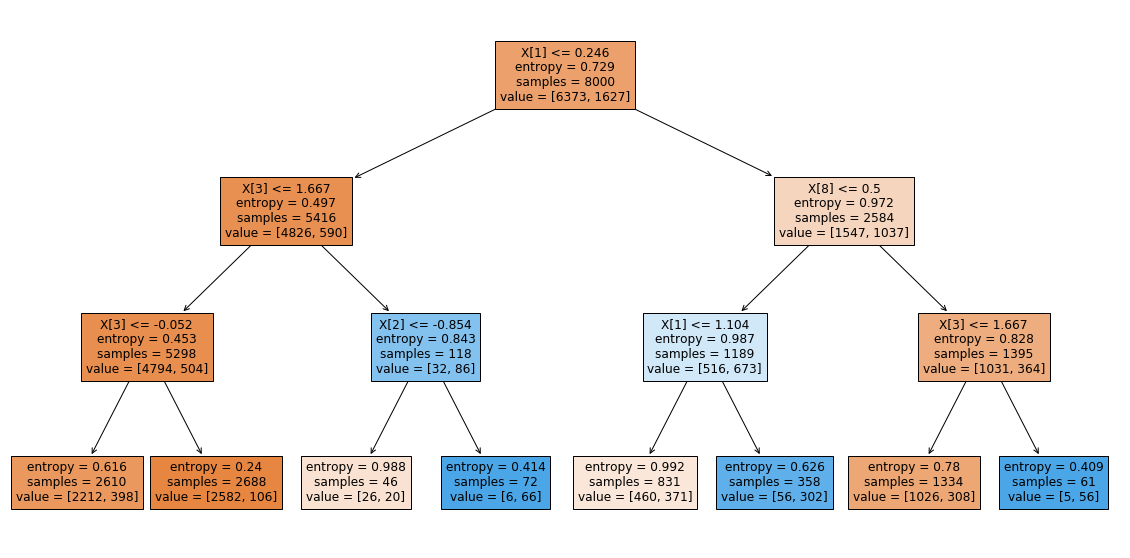

In [141]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(algo,filled=True)
plt.show()